# Naïve Bayes Classification

Naïve Bayes (NB) classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem:

![alt text](https://miro.medium.com/max/724/1*aFhOj7TdBIZir4keHMgHOw.png)

with strong (naïve) independence assumptions between the features. 


![alt text](https://i.stack.imgur.com/J14SS.png)








In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import CategoricalNB

In [ ]:
## Read dataset 
url = 'https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/4a8e3da267a0c1f0d650901d8295a5153bde8b21/PlayTennis.csv'
df = pd.read_csv(url)
print(df)
####   convert dataframe to list of columns 
outlook = df['Outlook'].tolist()
temp = df['Temperature'].tolist()
humid = df['Humidity'].tolist()
win = df['Wind'].tolist()

####   convert dataframe to list of labels 
Y = df['Play Tennis'].tolist()

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No


In [ ]:
# Encode feature values to integer 
le = preprocessing.LabelEncoder()

outlook_encoded=le.fit_transform(outlook)     ## {'Overcast': 0, 'Rain' : 1 'Sunny' :2}
temp_encoded=le.fit_transform(temp)           ## {'Cool': 0, 'Hot' : 1 'Mild' :2}                        
humid_encoded=le.fit_transform(humid)
win_encoded=le.fit_transform(win)

# convert encoded values into feature matrix 
X = [[outlook_encoded[i], temp_encoded[i], humid_encoded[i], win_encoded[i]] for i in range(0, len(outlook_encoded))]

# encode labels to integer {'No' : 0, 'Yes' : 1}
Y=le.fit_transform(Y)

In [ ]:
clf = CategoricalNB()             ## build NB classifier 
clf.fit(X, Y)

X_new = [0, 1, 1, 1]
predicted= clf.predict([X_new]) 
print('predicted label = ' , predicted[0])

print('Posterior probabilities of the new sample :' , clf.predict_proba([X_new])[0])     ## print prob. of predicted sample

None
predicted label =  1
Posterior probabilities of the new sample : [0.07028074 0.92971926]


## Guassian NB

accuracy =  98.5


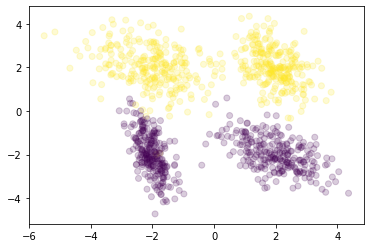

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Random N samples of two features 
X, Y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0,  class_sep=2.0)

plt.scatter(X[:,0], X[:,1], alpha=0.2, c=Y, cmap='viridis')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print('accuracy = ', result.mean()*100)

## Plot decision boundary of NB

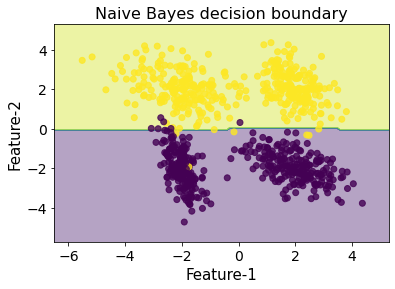

In [ ]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

plt.figure()
plt.title('Naive Bayes decision boundary', fontsize=16)
plot_decision_boundaries(X_train, y_train, GaussianNB)
plt.show()

## ์NLP with Naive Bayes

In [ ]:
documents = ['A great experience',
             'The service was awful',
             'I love this restaurant',
             'They offer great coffee and service here',
             'Do not waste great money at this place']
labels = [1,0,1,1,0]

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()   

#count_vector = CountVectorizer(stop_words = 'english')     ## use stop words 

count_vector.fit(documents)                          ## build vocab from training documents 

count_vector.vocabulary_                             ## print vocab.

{'great': 6,
 'experience': 5,
 'the': 15,
 'service': 14,
 'was': 18,
 'awful': 2,
 'love': 8,
 'this': 17,
 'restaurant': 13,
 'they': 16,
 'offer': 11,
 'coffee': 3,
 'and': 0,
 'here': 7,
 'do': 4,
 'not': 10,
 'waste': 19,
 'money': 9,
 'at': 1,
 'place': 12}

In [ ]:
doc_array = count_vector.transform(documents).toarray()              ## convert all documents to numpy array 
doc_array

array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]],
      dtype=int64)

In [ ]:
from sklearn.naive_bayes import BernoulliNB                 
clf = BernoulliNB()

clf.fit(doc_array, labels)

newVec = CountVectorizer(vocabulary=count_vector.vocabulary_)    ### load Vocab. 
new_doc = ['great coffee !!!!']

doc_array = newVec.transform(new_doc).toarray()                  ## convert to numpy array 
print(doc_array)

y_label = clf.predict(doc_array)                                 ## predict new document 
print(clf.predict_proba(doc_array), y_label[0])                  ## print posterior prob. and predicted label  

[[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0.01645618 0.98354382]] 1


## LAB 

1. โหลดชุดข้อมูล Iris จาก URL 
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
ด้วย pandas 

In [3]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pandas import read_csv 

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

data = read_csv(url)

iris= data.values 

X = iris[:,0:4]
y = iris[:,4]
print(X.shape, y.shape)
print(y)

(150, 4) (150,)
['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor'

2.สร้างโมเดล NB ด้วยชุดข้อมูลข้อที่ 1 ซึ่งถูกแบ่งออกเป็นชุดข้อมูลฝึกฝน 80% และชุดข้อมูลทดสอบ 20% พร้อมแสดงค่าความแม่นยำ (accuracy) บนชุดข้อมูลทดสอบ 

In [ ]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

gnb_predictions = gnb.predict(X_test)

print('sum error = ', np.sum(y_test != gnb_predictions))
result = gnb.score(X_test, y_test)
print("accuracy = ", result*100.0)

sum error =  3
accuracy =  90.0


3. สร้างโมเดล decision tree จากนั้นเปรียบเทียบความแม่นยำกับโมเดล NB บนชุดข้อมูลทดสอบ (X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = clf.fit(X_train, y_train)
result = clf.score(X_test, y_test)
print("accuracy = ", result*100.0)

accuracy =  26.666666666666668


4. โหลดชุดข้อมูล SMS spam dataset จาก Kaggle 

![alt text](https://miro.medium.com/max/836/1*OQEH3QD6kMRBTicgI_RtIQ.jpeg)

ได้ที่ 
https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'

เนื่องจากชุดข้อมูล SMS มีอักขระที่หลากหลาย ให้ใช้คำสั่งนี้ในการอ่านข้อมูลจาก url 
df = pd.read_csv(url, encoding='latin-1')







In [4]:
import pandas as pd 
from sklearn import preprocessing

url = 'https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'

df = pd.read_csv(url, encoding='latin-1')

labels = df['v1'].tolist()
sms = df['v2'].tolist()

le = preprocessing.LabelEncoder()
label_encoded=le.fit_transform(labels)   

In [7]:
len(sms)

5572

5. ใช้ CountVectorizer สร้างชุด vocab สำหรับชุดข้อมูล SMS โดยกำจัด stop word ทิ้ง จากนั้นแสดงจำนวน vocab ที่เหลือ

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(stop_words = 'english')     ## use stop words 
count_vector.fit(sms)                          ## build vocab from training documents 
print('vocaburay size = ', len(count_vector.vocabulary_))                             ## print vocab.

vocaburay size =  8404


In [9]:
count_vector.vocabulary_

{'jurong': 4224,
 'point': 5741,
 'crazy': 2271,
 'available': 1271,
 'bugis': 1703,
 'great': 3534,
 'world': 8227,
 'la': 4349,
 'buffet': 1701,
 'cine': 1994,
 'got': 3494,
 'amore': 1051,
 'wat': 8026,
 'ok': 5343,
 'lar': 4385,
 'joking': 4192,
 'wif': 8134,
 'oni': 5369,
 'free': 3265,
 'entry': 2875,
 'wkly': 8185,
 'comp': 2110,
 'win': 8146,
 'fa': 3005,
 'cup': 2329,
 'final': 3121,
 'tkts': 7519,
 '21st': 411,
 '2005': 402,
 'text': 7388,
 '87121': 784,
 'receive': 6115,
 'question': 6010,
 'std': 7028,
 'txt': 7701,
 'rate': 6062,
 'apply': 1128,
 '08452810075over18': 77,
 'dun': 2738,
 'say': 6450,
 'early': 2757,
 'hor': 3815,
 'nah': 5092,
 'don': 2651,
 'think': 7443,
 'goes': 3458,
 'usf': 7837,
 'lives': 4535,
 'freemsg': 3272,
 'hey': 3732,
 'darling': 2386,
 'week': 8071,
 'word': 8218,
 'like': 4485,
 'fun': 3323,
 'tb': 7323,
 'xxx': 8292,
 'chgs': 1948,
 'send': 6536,
 '50': 607,
 'rcv': 6074,
 'brother': 1674,
 'speak': 6910,
 'treat': 7634,
 'aids': 985,
 'pate

6. convert ชุดข้อความ sms ให้อยู่ในรูปของ feature vectors จากนั้นแบ่งชุดข้อมูล เป็นชุดข้อมูลฝึกฝน 90% และชุดข้อมูลทดสอบ 10%  แสดงจำนวนชุดข้อมูลใน training data 

In [11]:
doc_array = count_vector.transform(sms).toarray() 
X_train, X_test, y_train, y_test = train_test_split(doc_array, label_encoded, test_size=0.1)
print('number of training sms : ', X_train.shape[0])
print('number of test sms : ', X_test.shape[0])
print(X_train[0:10])

number of training sms :  5014
number of test sms :  558
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


7. สร้างโมเดล Benoulii NB ด้วยชุดข้อมูลฝึกฝน จากนั้นแสดงค่าความแม่นยำของโมเดลบนชุดข้อมูลทดสอบ 

In [12]:
from sklearn.naive_bayes import BernoulliNB                 
clf = BernoulliNB()

clf.fit(X_train, y_train)
result = clf.score(X_test, y_test)
print(result*100)

98.9247311827957


8. ทดลองสร้างข้อความ SMS ได้แก่ 'hello world' จากนั้นแสดง label ที่ใช้โมเดล NB ในข้อที่ 7 ทำนาย

In [13]:
new_doc = ['hello world']
newVec = CountVectorizer(vocabulary=count_vector.vocabulary_)    ### load Vocab. 
doc_array = newVec.transform(new_doc).toarray()                  ## convert to numpy array 

y_label = clf.predict(doc_array)                                 ## predict new document 

print(clf.predict_proba(doc_array), y_label[0])                  ## print posterior prob. and predicted label 

[[1.00000000e+00 3.03610121e-10]] 0
